In [2]:
# 1. Montar Drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


# Cargar archivo desde Drive
file_o = "/content/drive/MyDrive/datos laboratorio intermedio/2025_08_15 Doble rendija Kenneth Rodrìguez.xlsx"

# Leer hoja "láser"
laser_df = pd.read_excel(file_o, sheet_name="láser")

# Leer hoja "bombillo"
bombillo_df = pd.read_excel(file_o, sheet_name="bombillo")

Mounted at /content/drive


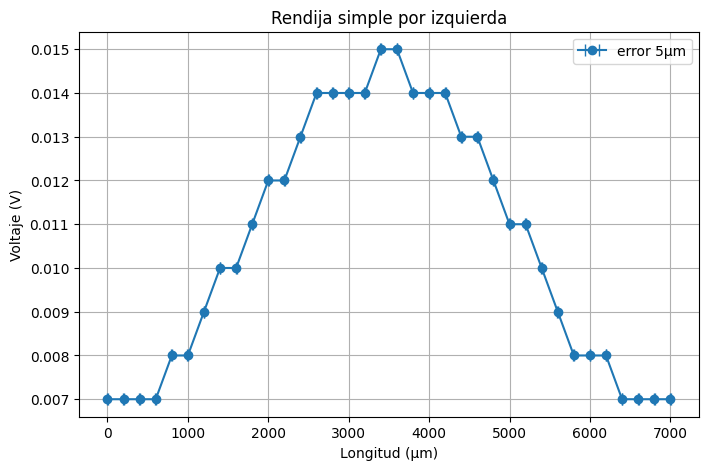

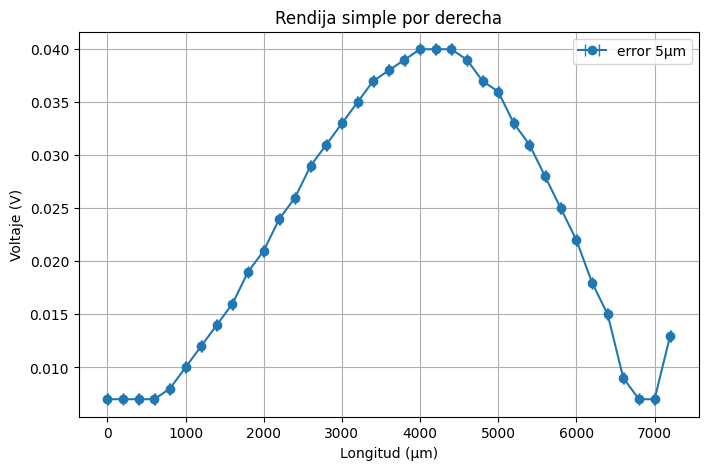

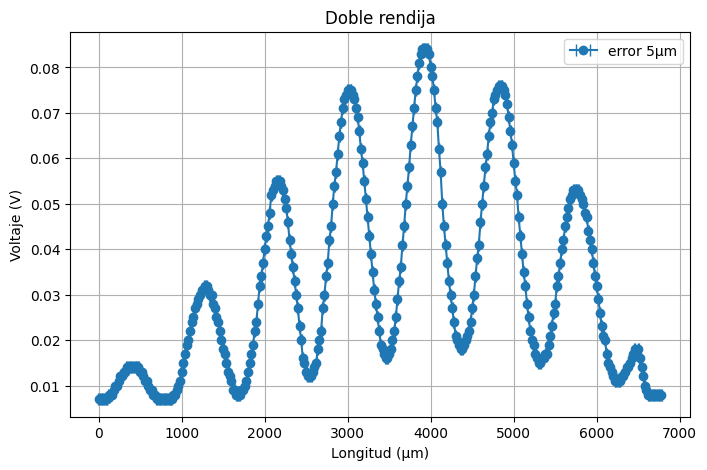

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Le decimos que los encabezados están en la fila 2 (índice 1)
laser_df = pd.read_excel(file_o, sheet_name="láser", header=1)

# --- Seleccionar por bloques (con columnas numéricas ya limpias) ---
bloque1 = laser_df.iloc[:, 0:2].dropna()
bloque2 = laser_df.iloc[:, 4:6].dropna()
bloque3 = laser_df.iloc[:, 11:13].dropna()

# --- Graficar Bloque 1 ---
plt.figure(figsize=(8,5))
plt.errorbar(bloque1.iloc[:,0], bloque1.iloc[:,1],
             xerr=5, fmt="o-", capsize=4, label="error 5µm")
plt.xlabel("Longitud (µm)")
plt.ylabel("Voltaje (V)")
plt.title("Rendija simple por izquierda")
plt.grid()
plt.legend()
plt.show()

# --- Graficar Bloque 2 ---
plt.figure(figsize=(8,5))
plt.errorbar(bloque2.iloc[:,0], bloque2.iloc[:,1],
             xerr=5, fmt="o-", capsize=4, label="error 5µm")
plt.xlabel("Longitud (µm)")
plt.ylabel("Voltaje (V)")
plt.title("Rendija simple por derecha")
plt.grid()
plt.legend()
plt.show()

# --- Graficar Bloque 3 ---
plt.figure(figsize=(8,5))
plt.errorbar(bloque3.iloc[:,0], bloque3.iloc[:,1],
             xerr=5, fmt="o-", capsize=4, label="error 5µm")
plt.xlabel("Longitud (µm)")
plt.ylabel("Voltaje (V)")
plt.title("Doble rendija")
plt.grid()
plt.legend()
plt.show()


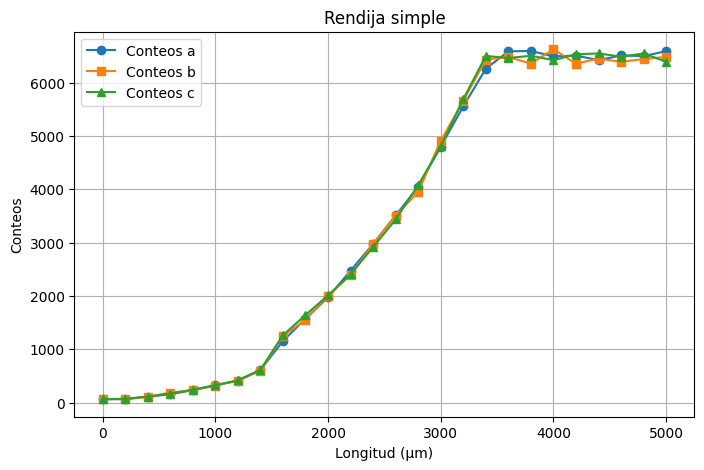

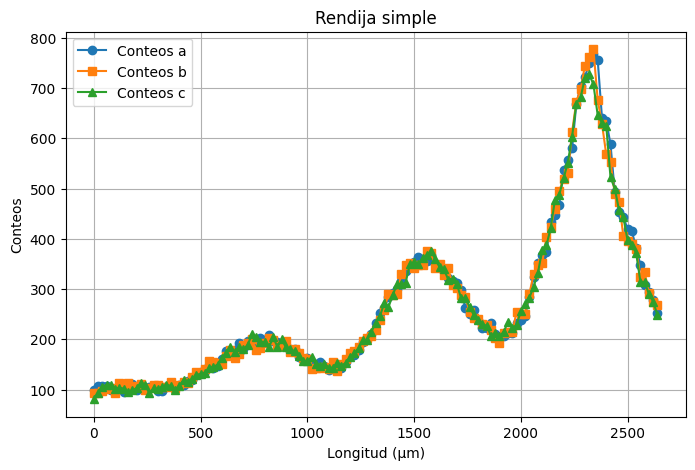

In [ ]:
# Le decimos que los encabezados están en la fila 2 (índice 1)
bombillo_df = pd.read_excel(file_o, sheet_name="bombillo", header=1)

# Extraer columnas
longitud   = bombillo_df.iloc[:, 0]  # Columna de Longitud
conteos_a  = bombillo_df.iloc[:, 1]  # Conteos a
conteos_b  = bombillo_df.iloc[:, 2]  # Conteos b
conteos_c  = bombillo_df.iloc[:, 3]  # Conteos c

# Graficar los tres en la misma figura
plt.figure(figsize=(8,5))
plt.plot(longitud, conteos_a, "o-", label="Conteos a")
plt.plot(longitud, conteos_b, "s-", label="Conteos b")
plt.plot(longitud, conteos_c, "^-", label="Conteos c")

plt.xlabel("Longitud (µm)")
plt.ylabel("Conteos")
plt.title("Rendija simple")
plt.grid()
plt.legend()
plt.show()


longitud_2   = bombillo_df.iloc[:, 6]  # Columna de Longitud
conteos_a_2  = bombillo_df.iloc[:, 7]  # Conteos a
conteos_b_2  = bombillo_df.iloc[:, 8]  # Conteos b
conteos_c_2 = bombillo_df.iloc[:, 9]  # Conteos c

# Graficar los tres en la misma figura
plt.figure(figsize=(8,5))
plt.plot(longitud_2, conteos_a_2, "o-", label="Conteos a")
plt.plot(longitud_2, conteos_b_2, "s-", label="Conteos b")
plt.plot(longitud_2, conteos_c_2, "^-", label="Conteos c")

plt.xlabel("Longitud (µm)")
plt.ylabel("Conteos")
plt.title("Rendija simple")
plt.grid()
plt.legend()
plt.show()

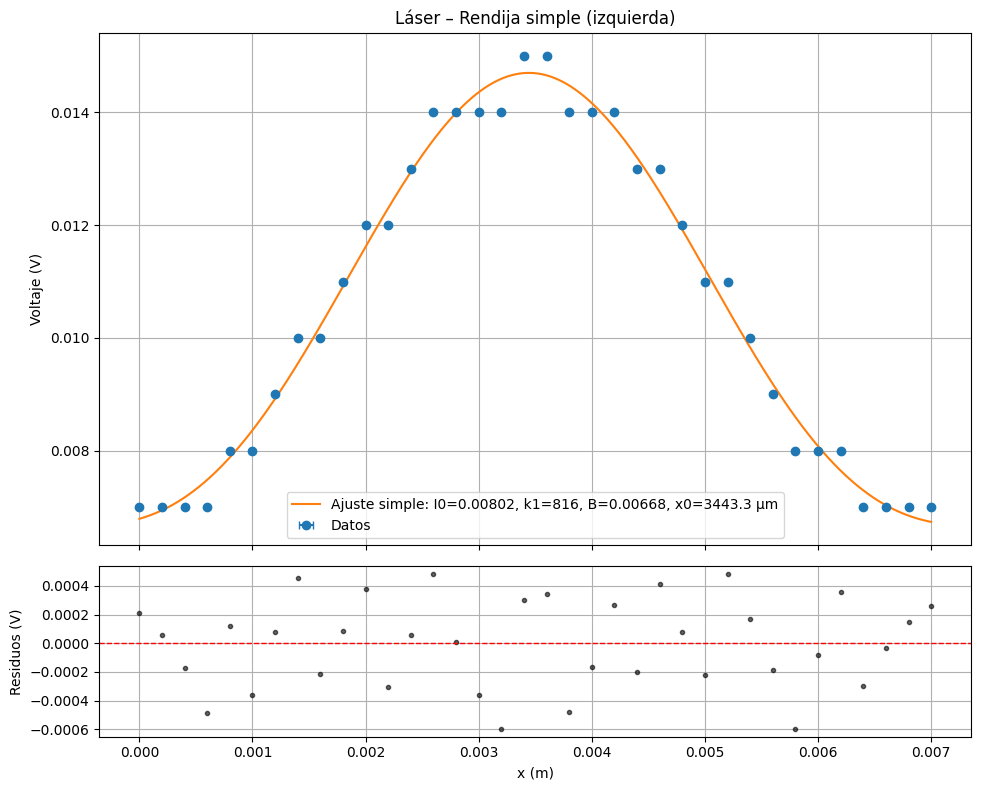

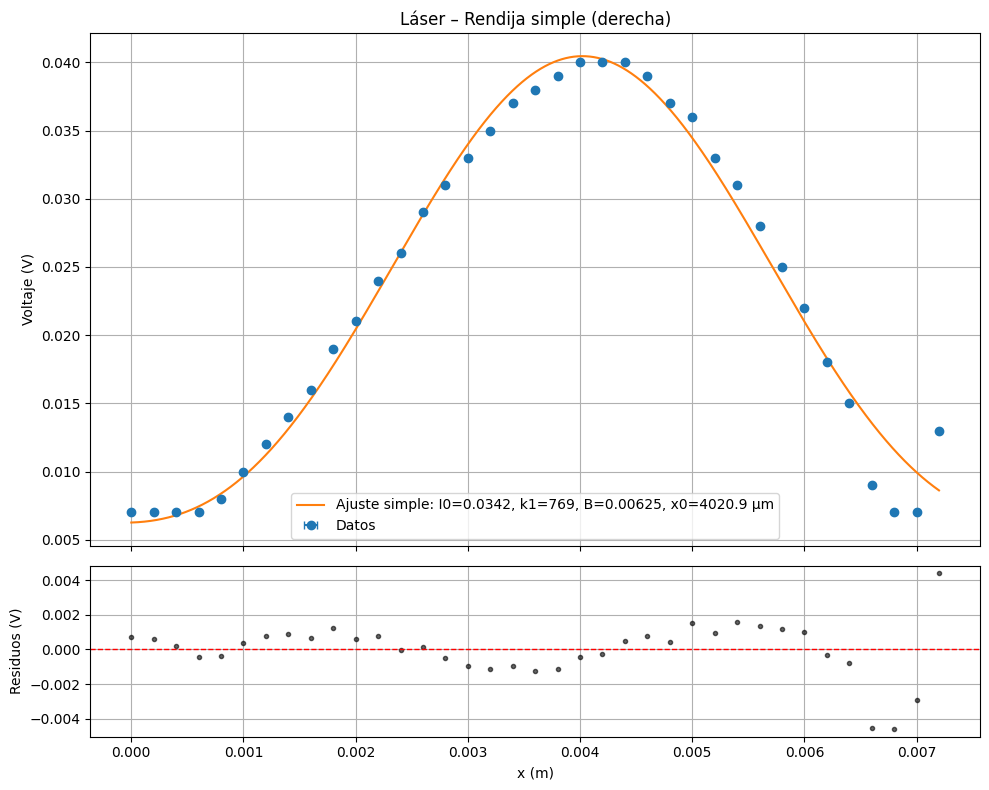

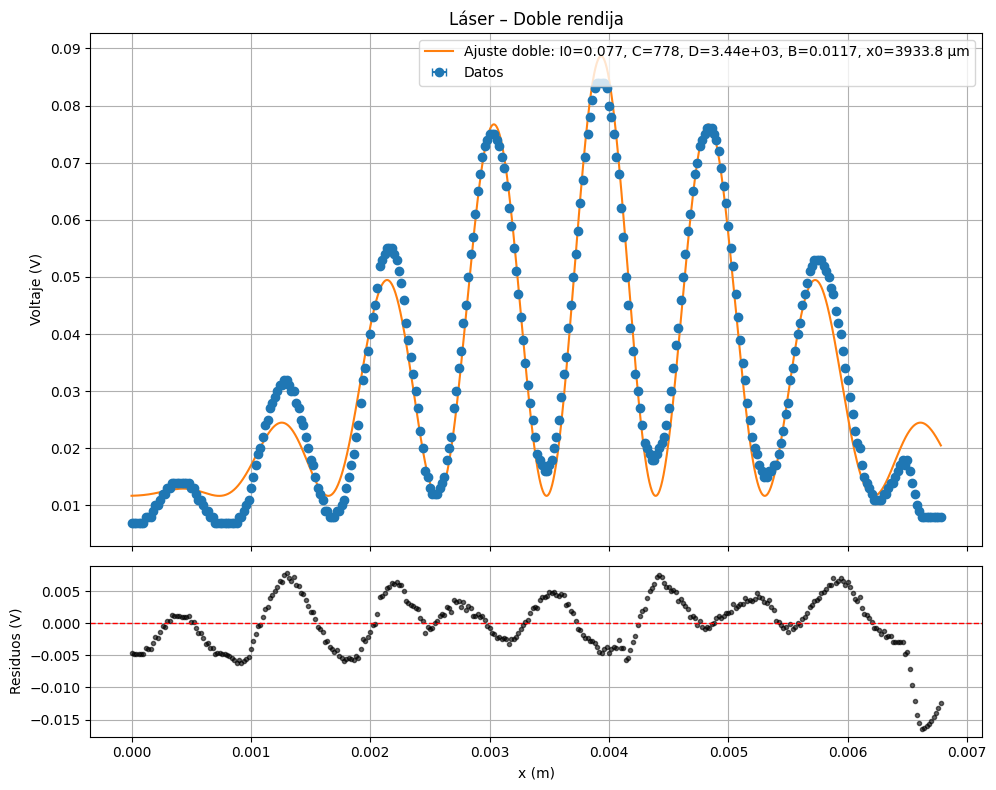


Izquierda – Rendija simple:
I0     = 0.00801902 ± 0.00019
k1     = 815.686 ± 24
B      = 0.00668368 ± 0.00019
x0     = 0.00344331 ± 2.2e-05

Derecha – Rendija simple:
I0     = 0.0342022 ± 0.00094
k1     = 768.653 ± 25
B      = 0.00624971 ± 0.00092
x0     = 0.0040209 ± 2.8e-05

Doble rendija:
I0     = 0.0769893 ± 0.0009
C      = 777.932 ± 10
D      = 3436.57 ± 7.1
B      = 0.0116683 ± 0.00041
x0     = 0.00393382 ± 2.1e-06


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# ---------- 1) Cargar y armar bloques ----------
laser_df = pd.read_excel(file_o, sheet_name="láser", header=1)

bloque1 = laser_df.iloc[:, 0:2].dropna()    # Rendija simple (izquierda)
bloque2 = laser_df.iloc[:, 4:6].dropna()    # Rendija simple (derecha)
bloque3 = laser_df.iloc[:, 11:13].dropna()  # Doble rendija

# Convierte a numpy y a metros (x está en µm en tu Excel)
def to_xy(df):
    x_um = df.iloc[:,0].to_numpy(dtype=float)
    y = df.iloc[:,1].to_numpy(dtype=float)
    x_m = x_um * 1e-6
    return x_m, y

x1, y1 = to_xy(bloque1)
x2, y2 = to_xy(bloque2)
x3, y3 = to_xy(bloque3)

# ---------- 2) Modelos ----------
# Rendija simple
def single_slit_model(x, I0, k1, B, x0):
    beta = k1 * (x - x0)
    return B + I0 * (np.sinc(beta/np.pi)**2)

# Doble rendija
def double_slit_model(x, I0, C, D, B, x0):
    arg = (x - x0)
    return B + I0 * (np.cos(D*arg)**2) * (np.sinc(C*arg/np.pi)**2)

# ---------- 3) Ajustes ----------
def guesses(x, y):
    I0_guess = (np.nanmax(y) - np.nanmin(y))
    B_guess  = np.nanmin(y)
    x0_guess = x[np.argmax(y)]  # máximo ~ centro
    return I0_guess, B_guess, x0_guess

# Rendija simple izq
I0g, Bg, x0g = guesses(x1, y1)
p0_single1 = [I0g, 1e4, Bg, x0g]      # [I0, k1, B, x0]
bounds_single = ([0,    1e0,  -np.inf, x1.min()-1e-2],
                 [np.inf,1e7, np.inf,  x1.max()+1e-2])
popt1, pcov1 = curve_fit(single_slit_model, x1, y1, p0=p0_single1,
                         bounds=bounds_single, maxfev=20000)

# Rendija simple der
I0g, Bg, x0g = guesses(x2, y2)
p0_single2 = [I0g, 1e4, Bg, x0g]
popt2, pcov2 = curve_fit(single_slit_model, x2, y2, p0=p0_single2,
                         bounds=bounds_single, maxfev=20000)

# ------------------ DOBLE RENDIJA ------------------
# Parámetros de la guía como semillas de otro código que suministró los parámetros que se ajustaban mejor a la curva:
# I0 = 0.0769893, C = 777.931, D = 3436.57, B = 0.0116683, x0 = 3933.816 µm
p0_double = [0.0769893, 777.931, 3436.57, 0.0116683, 3933.816e-6]
bounds_double = ([0,    1e0,  1e0,  -np.inf, x3.min()-1e-2],
                 [np.inf,1e7, 1e7,  np.inf,  x3.max()+1e-2])

popt3, pcov3 = curve_fit(double_slit_model, x3, y3,
                         p0=p0_double, bounds=bounds_double, maxfev=40000)

# ---------- 4) Curvas ajustadas (malla fina) ----------
def fine_fit(x, f, params):
    xx = np.linspace(x.min(), x.max(), 2000)
    yy = f(xx, *params)
    return xx, yy

xx1, yy1 = fine_fit(x1, single_slit_model, popt1)
xx2, yy2 = fine_fit(x2, single_slit_model, popt2)
xx3, yy3 = fine_fit(x3, double_slit_model, popt3)

# ---------- 5) Gráficas (con barras de error ±5 µm en X) ----------
xerr_um = 5.0
xerr_m  = xerr_um * 1e-6

# ---------- Bloque 1: Rendija simple (izquierda) ----------
res1 = y1 - single_slit_model(x1, *popt1)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True,
                               gridspec_kw={'height_ratios':[3,1]})

ax1.errorbar(x1, y1, xerr=xerr_m, fmt="o", capsize=3, label="Datos")
ax1.plot(xx1, yy1, '-', lw=1.5,
         label=(f"Ajuste simple: I0={popt1[0]:.3g}, k1={popt1[1]:.3g}, "
                f"B={popt1[2]:.3g}, x0={popt1[3]*1e6:.1f} µm"))
ax1.set_ylabel("Voltaje (V)")
ax1.set_title("Láser – Rendija simple (izquierda)")
ax1.legend(); ax1.grid()

ax2.plot(x1, res1, 'k.', alpha=0.6, label="Residuos")
ax2.axhline(0, color='r', linestyle='--', lw=1)
ax2.set_xlabel("x (m)")
ax2.set_ylabel("Residuos (V)")
ax2.grid()

plt.tight_layout()
plt.show()


# ---------- Bloque 2: Rendija simple (derecha) ----------
res2 = y2 - single_slit_model(x2, *popt2)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True,
                               gridspec_kw={'height_ratios':[3,1]})

ax1.errorbar(x2, y2, xerr=xerr_m, fmt="o", capsize=3, label="Datos")
ax1.plot(xx2, yy2, '-', lw=1.5,
         label=(f"Ajuste simple: I0={popt2[0]:.3g}, k1={popt2[1]:.3g}, "
                f"B={popt2[2]:.3g}, x0={popt2[3]*1e6:.1f} µm"))
ax1.set_ylabel("Voltaje (V)")
ax1.set_title("Láser – Rendija simple (derecha)")
ax1.legend(); ax1.grid()

ax2.plot(x2, res2, 'k.', alpha=0.6, label="Residuos")
ax2.axhline(0, color='r', linestyle='--', lw=1)
ax2.set_xlabel("x (m)")
ax2.set_ylabel("Residuos (V)")
ax2.grid()

plt.tight_layout()
plt.show()


# Bloque 3: Doble rendija (datos + ajuste + residuos en subplot)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8), sharex=True,
                               gridspec_kw={'height_ratios':[3,1]})

# ajuste
ax1.errorbar(x3, y3, xerr=xerr_m, fmt="o", capsize=3, label="Datos")
ax1.plot(xx3, yy3, '-', lw=1.5,
         label=(f"Ajuste doble: I0={popt3[0]:.3g}, C={popt3[1]:.3g}, "
                f"D={popt3[2]:.3g}, B={popt3[3]:.3g}, x0={popt3[4]*1e6:.1f} µm"))
ax1.set_ylabel("Voltaje (V)")
ax1.set_title("Láser – Doble rendija")
ax1.legend(); ax1.grid()

# residuos
res = y3 - double_slit_model(x3, *popt3)
ax2.plot(x3, res, 'k.', alpha=0.6)
ax2.axhline(0, color='r', linestyle='--', lw=1)
ax2.set_xlabel("x (m)")
ax2.set_ylabel("Residuos (V)")
ax2.grid()

plt.tight_layout()
plt.show()

# ---------- 6) Imprimir parámetros con sus incertidumbres ----------
def param_table(popt, pcov, names):
    perr = np.sqrt(np.diag(pcov))
    for n, v, e in zip(names, popt, perr):
        print(f"{n:6s} = {v:.6g} ± {e:.2g}")

print("\nIzquierda – Rendija simple:")
param_table(popt1, pcov1, ["I0","k1","B","x0"])

print("\nDerecha – Rendija simple:")
param_table(popt2, pcov2, ["I0","k1","B","x0"])

print("\nDoble rendija:")
param_table(popt3, pcov3, ["I0","C","D","B","x0"])
